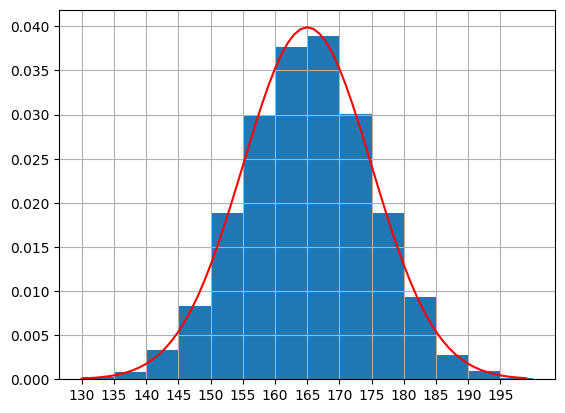

In [20]:
from scipy.constants import sigma
from scipy.stats import norm, bernoulli
from numpy import mean, std, linspace
from matplotlib.pyplot import show, hist, grid, legend, xticks, plot
from scipy.stats import expon

def f(n, m, sigma):
    return norm.rvs(loc = m, scale = sigma, size = n)
f(5, 165, 10)


data = f(5000, 165, 10)
hist(data, bins=14, density = True,range=(130,200))
x = range(130,200)
plot(x,norm.pdf(x,loc = 165, scale = 10),'r-')
xticks(range(130,200,5))
grid()
show()

In [52]:
print(sum([160 < x < 170 for x in data]) / len(data))
print(norm.cdf(170, loc = 165, scale = 10) - norm.cdf(160, loc = 165, scale = 10))
print(data.mean())
print(std(data))

0.3826
0.38292492254802624
165.05358362314976
9.923911979093505


In [59]:
from scipy.stats import expon, uniform, bernoulli
from numpy import mean, std, multiply

i = bernoulli.rvs(p = 0.4, size = 1000)
data_ = [imp * expon.rvs(loc = 0, scale = 5) + (1 - imp) * uniform.rvs(loc = 4, scale = 2) for imp in i]
print(sum(data_) / len(data_))
print(mean(data_))
print(std(data_))

dataLTFive = [i < 5 for i in data_]
print(mean(dataLTFive))

# formula probalitatii (cand intervin conditionari si vrem sa spargem probabilitatea pe cazuri => inmultim cu cat sunt sansele sa mergem pe acea ramura)
print(0.4 * expon.cdf(5, scale = 5) + 0.6 * uniform.cdf(5, loc= 4, scale = 2))

5.218390539506873
5.21839053950688
3.4519311383449476
0.536
0.552848223531423


In [67]:
# LTNM => daca apelezi aceeasi functie x de n ori, toate apelurile sunt independente, au aceeasi disgtributie (identitic distribuite) cu o avriabila aleatorie x => cand n tinde spre infinit 1/n(X1...Xn) -> E(x)
# x -> g(x)
from scipy.stats import uniform
from numpy import exp, mean
from scipy.integrate import quad

g = lambda y : exp(-y**2)

data = [g(uniform.rvs(loc = -1, scale = 4)) for _ in range(5000)]
print(mean(data) * (3 - (-1)))

print(quad(g, -1, 3))

1.6559390271792904
(1.6330314810719482, 1.813029149380471e-14)
